# Logistic Regression

In [1]:
# Loading Libraries

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.use(['seaborn-bright', 'dark_background'])
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('churn_prediction.csv')

In [3]:
df

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT


In [4]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2091.144105,48.208336,0.347236,796.109576,2.225530,925.975019,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,272.676775,17.807163,0.997661,432.872102,0.660443,937.799129,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,73.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1958.000000,36.000000,0.000000,409.000000,2.000000,176.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074407e+03,0.000000
50%,15150.500000,2154.000000,46.000000,0.000000,834.000000,2.000000,572.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,2292.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,2476.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

# Typecasting

### Integer data type

In [6]:
df.dtypes[df.dtypes=='int64']

customer_id             int64
vintage                 int64
age                     int64
customer_nw_category    int64
branch_code             int64
churn                   int64
dtype: object

<b> customer_id , branch_code  and  churn </b> should be  categorical variables .


In [7]:
df['customer_id']=df['customer_id'].astype('category')
df['branch_code']=df['branch_code'].astype('category')
df['customer_nw_category']=df['customer_nw_category'].astype('category')

### Float data type

In [8]:
df.dtypes[df.dtypes=='float64']

dependents                        float64
city                              float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

* **dependents** should be a whole number 
* **city** should be a categorical variable

In [9]:
df['dependents']=df['dependents'].astype('Int64')
df['city']=df['city'].astype('category')

### Object data type

In [10]:
df.dtypes[df.dtypes=='object']

gender              object
occupation          object
last_transaction    object
dtype: object

* **gender , occupation** should be a category data type
* **last_transaction** should be a date time data type

In [11]:
df['gender']=df['gender'].astype('category')
df['occupation']=df['occupation'].astype('category')

### Date time data type

In [12]:
# extracting new columns from "last_transaction"

# last day of year when transaction was done
df['dayofyear_ls_tran'] = pd.DatetimeIndex(df['last_transaction']).dayofyear

# week of year when last transaction was done
df['weekofyear_ls_tran'] = pd.DatetimeIndex(df['last_transaction']).weekofyear

# month of year when last transaction was done
df['monthofyear_ls_tran'] = pd.DatetimeIndex(df['last_transaction']).month

# day of week when last transaction was done
df['dayofweek_ls_tran'] = pd.DatetimeIndex(df['last_transaction']).dayofweek

# days since last transaction was done
df['days_since_last_transaction']=365-pd.DatetimeIndex(df['last_transaction']).dayofyear

* As we have extracted the essential information from **last_transaction** , now we will drop this variable.
* There are some 'NaT' values in **last_transaction** so we will delete the rows that contain such values as **last_transaction** is an important variable.

In [13]:
drop_index=df[df['last_transaction']=='NaT'].index

df.drop(drop_index,axis=0,inplace=True)

df.drop(labels='last_transaction',axis=1,inplace=True)

df.reset_index(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25159 entries, 0 to 25158
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   index                           25159 non-null  int64   
 1   customer_id                     25159 non-null  category
 2   vintage                         25159 non-null  int64   
 3   age                             25159 non-null  int64   
 4   gender                          24698 non-null  category
 5   dependents                      22992 non-null  Int64   
 6   occupation                      25091 non-null  category
 7   city                            24474 non-null  category
 8   customer_nw_category            25159 non-null  category
 9   branch_code                     25159 non-null  category
 10  current_balance                 25159 non-null  float64 
 11  previous_month_end_balance      25159 non-null  float64 
 12  average_monthly_ba

# Exploring Target Variable

In [15]:
df[['churn']]

,churn
0,0
1,0
2,1
3,1
4,0
...,...
25154,0
25155,0
25156,0
25157,1


In [16]:
# Checking for unique value counts

df['churn'].value_counts(normalize=True)*100

0    80.28141
1    19.71859
Name: churn, dtype: float64

In [17]:
# Checking for missing values in target variable

df['churn'].isnull().sum()

0

# Exploring Numerical Variable

In [18]:
# Numerical datatypes

df.select_dtypes(include=['int64','float64','Int64']).dtypes

index                               int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dayofyear_ls_tran                 float64
weekofyear_ls_tran                float64
monthofyear_ls_tran               float64
dayofweek_ls_tran                 float64
days_since_last_transaction       float64
dtype: object

In [19]:
# seggregating variables into groups

customer_details = ['age','vintage']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['dayofyear_ls_tran','weekofyear_ls_tran','monthofyear_ls_tran','dayofweek_ls_tran','days_since_last_transaction']

In [20]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = df[i].min()
    maxi = df[i].max()
    ran = df[i].max()-data[i].min()
    mean = df[i].mean()
    median = df[i].median()
    st_dev = df[i].std()
    skew = df[i].skew()
    kurt = df[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(df[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))
#     plt.subplots_adjust(hspace=0.7)

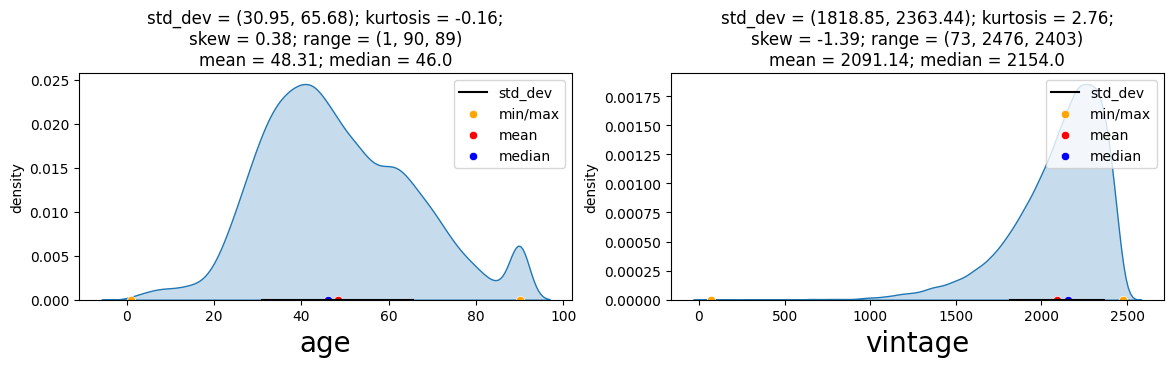

In [21]:
UVA_numeric(df,customer_details)

* There is abnormally high number of old age people 

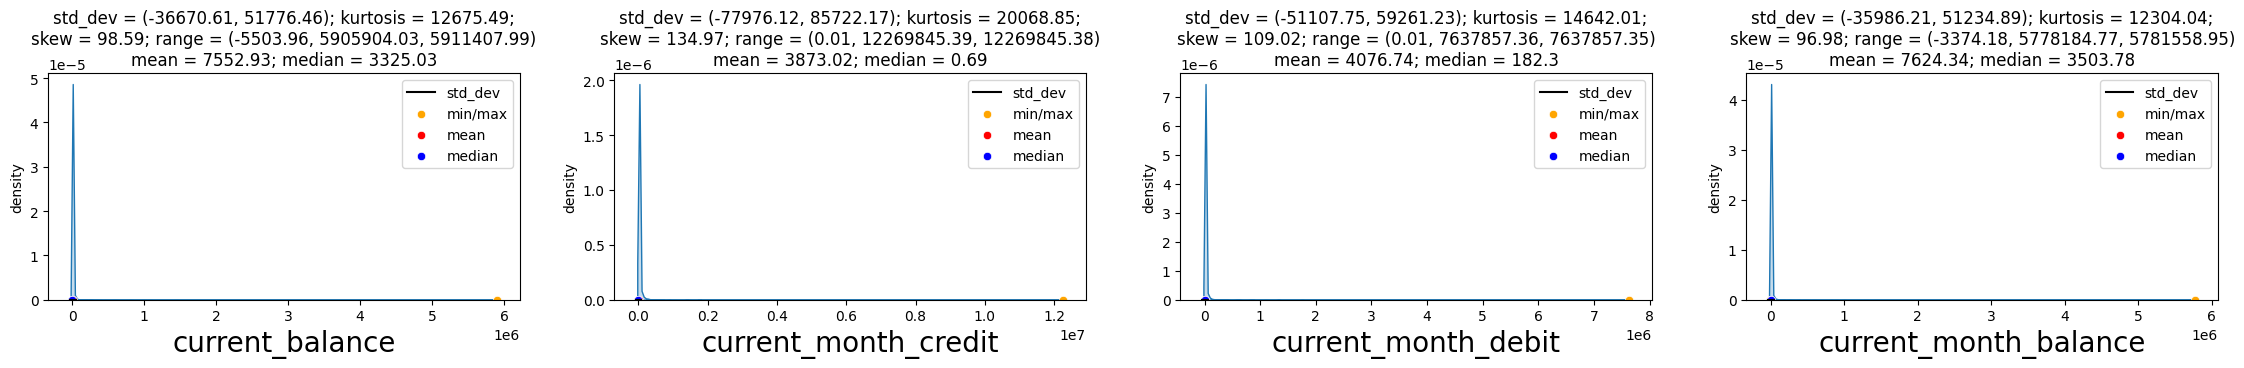

In [22]:
UVA_numeric(df,current_month)

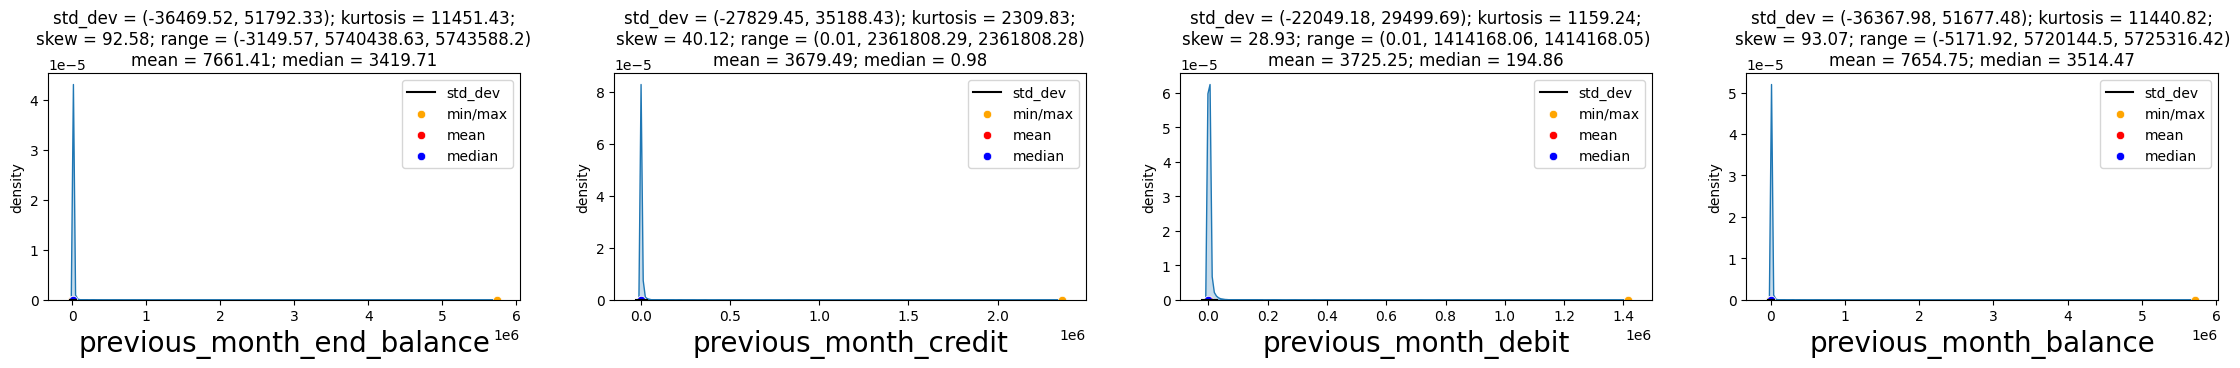

In [23]:
UVA_numeric(df,previous_month)

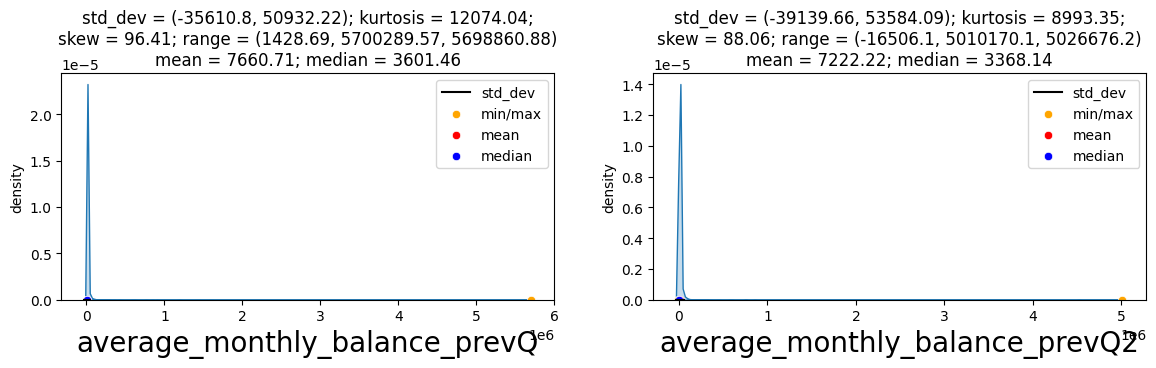

In [24]:
UVA_numeric(df,previous_quarters)

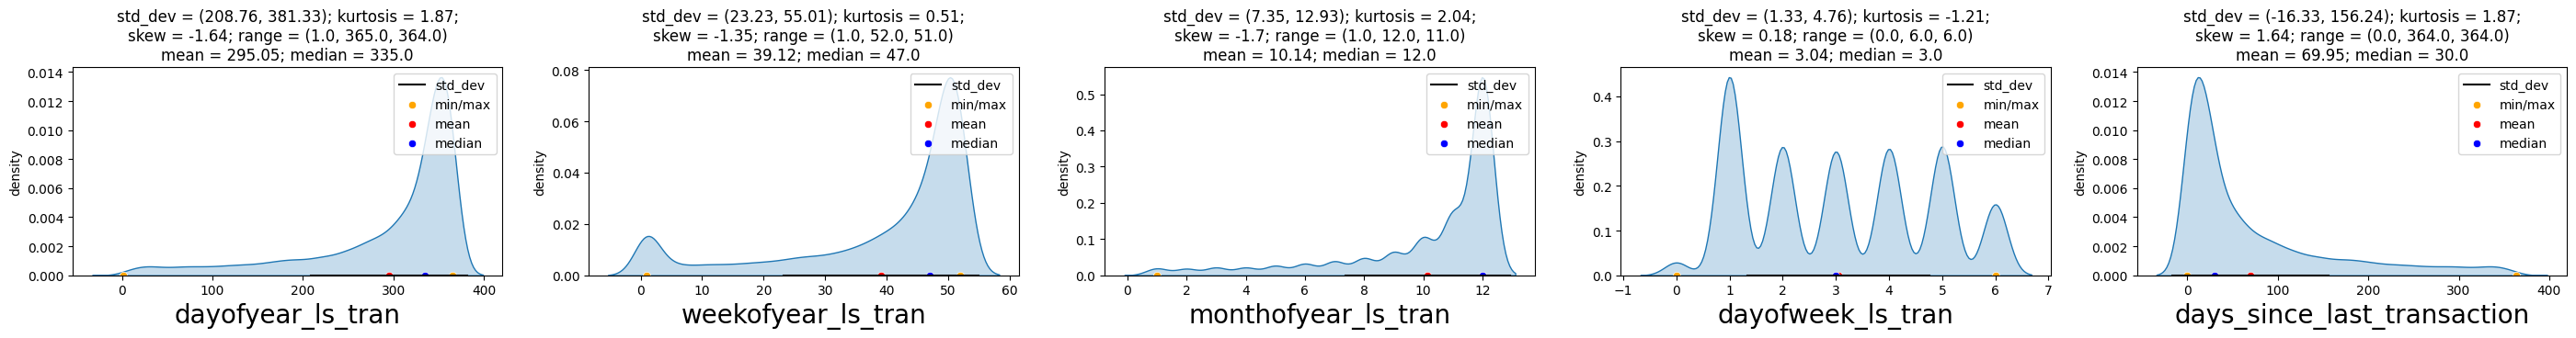

In [25]:
UVA_numeric(df,transaction_date)

# Exploring Categorical variable

In [26]:
# Categorical datatypes

df.select_dtypes(include='category').dtypes

customer_id             category
gender                  category
occupation              category
city                    category
customer_nw_category    category
branch_code             category
dtype: object

In [27]:
def UVA_category(data, var_group):
  # setting figure_size
    size = len(var_group)
    plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
    for j,i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize = True)
        n_uni = data[i].nunique()

  #Plotting the variable with every information
        plt.subplot(1,size,j+1)
        sns.barplot(norm_count, norm_count.index , order = norm_count.index)
        plt.xlabel('fraction/percent', fontsize = 20)
        plt.ylabel('{}'.format(i), fontsize = 20)
        plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))
        
        plt.subplots_adjust(wspace=0.5)

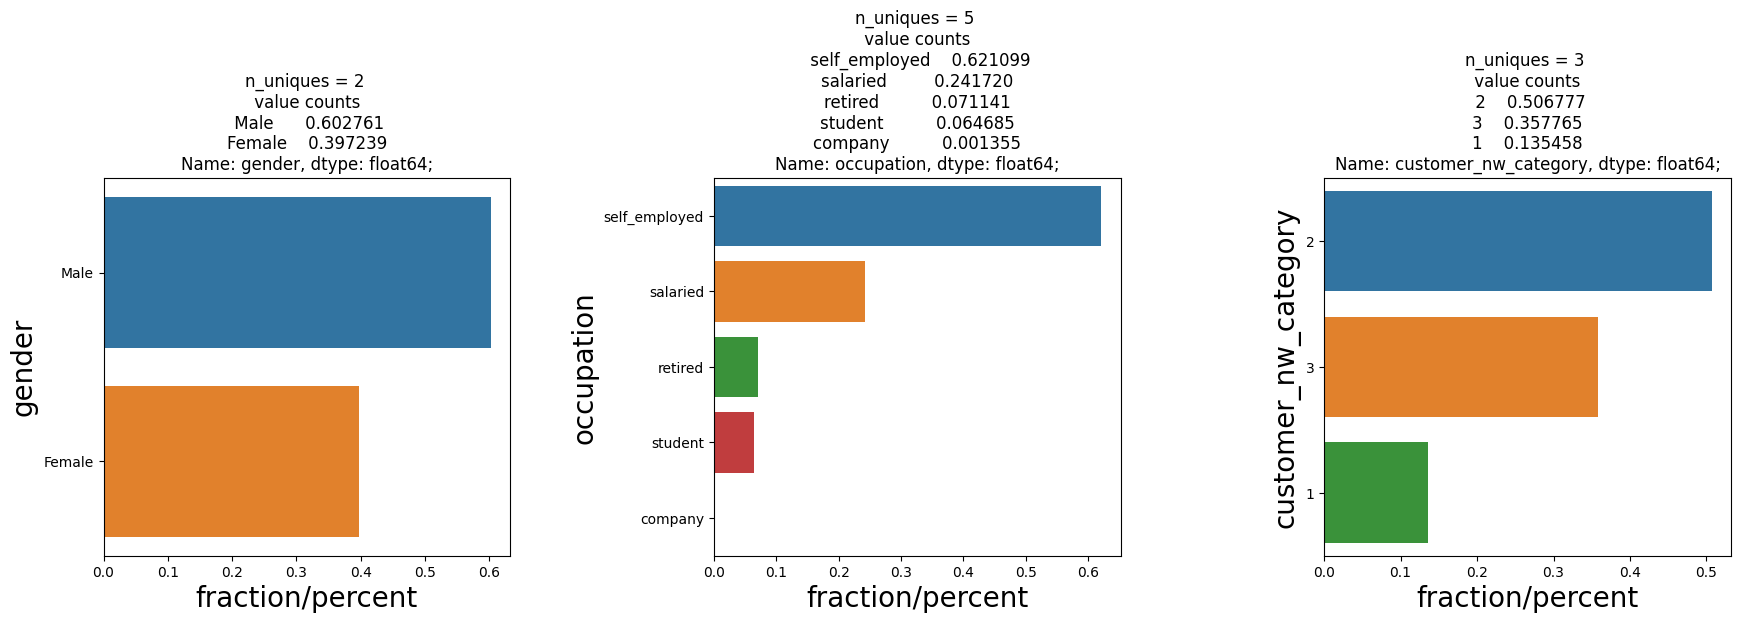

In [28]:
UVA_category(df,['gender','occupation','customer_nw_category'])

# Missing values 

In [29]:
# Finding missing values in both numerical and categorical variables

missing=[[str(i),df[i].isnull().sum()] for i in df.columns if df[i].isnull().sum()>0 ]
missing

[['gender', 461], ['dependents', 2167], ['occupation', 68], ['city', 685]]

* As we can see that **gender , dependents , occupation , city** has missing values in them

* As we earlier saw that **age** has some extreme values and **gender & age** maybe somehow related So, we will see for both the columns simultaneously.

* Whereas, the missing values of **dependents** will be replaced by 'mode', **occupation** by 'mode' , **city** by 'mode'

In [30]:
# Imputing missing values in 'dependents'

for i in range(len(df)):
    if i in (df[df['dependents'].isnull()].index):
        df['dependents'][i]=0

In [31]:
df['dependents'].value_counts()

0     20882
2      2069
1      1327
3       660
4       169
5        34
6         8
7         3
9         1
52        1
36        1
50        1
8         1
25        1
32        1
Name: dependents, dtype: Int64

* We will limit the values of **dependents** upto 7  only

In [32]:
def limit(a):
    if a>7:
        return(7)
    else :
        return(a)
df['dependents']=df['dependents'].map(limit)

In [33]:
df['occupation'].value_counts()

self_employed    15584
salaried          6065
retired           1785
student           1623
company             34
Name: occupation, dtype: int64

In [34]:
# Imputing missing values in 'occupation'

for i in range(len(df)):
    if i in (df[df['occupation'].isnull()].index):
        df['occupation'][i]=df['occupation'].mode()

In [35]:
# Imputing missing values in 'city'

for i in range(len(df)):
    if i in (df[df['city'].isnull()].index):
        df['city'][i]=df['city'].mode()

In [36]:
# Checking for extreme values in 'age' & null values in gender

abnm=df[(df['age']>80) & (df['gender'].isnull())]
abnm

,index,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,dayofyear_ls_tran,weekofyear_ls_tran,monthofyear_ls_tran,dayofweek_ls_tran,days_since_last_transaction
2,3,5,2329,90,NaN,0,self_employed,1020.0,2,582,...,0.47,2143.33,2291.91,1669.79,1,218.0,32.0,8.0,1.0,147.0
27,33,36,2235,90,NaN,0,self_employed,834.0,3,8,...,0.20,14.49,6461.22,2087.69,0,288.0,42.0,10.0,1.0,77.0
34,41,44,2115,90,NaN,0,self_employed,1020.0,3,2939,...,0.23,0.23,7870.87,7870.87,0,304.0,44.0,10.0,3.0,61.0
167,188,203,1922,90,NaN,0,self_employed,575.0,3,622,...,428.61,209.77,4140.81,3954.40,0,359.0,52.0,12.0,2.0,6.0
339,376,404,2330,90,NaN,0,self_employed,1096.0,2,1719,...,0.33,2763.38,11635.91,8824.02,0,306.0,44.0,11.0,5.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24940,28130,30030,2062,90,NaN,0,self_employed,1494.0,2,1249,...,7850.40,6809.44,6057.51,4550.80,0,304.0,44.0,10.0,3.0,61.0
24989,28182,30089,2407,90,NaN,0,self_employed,1020.0,1,163,...,0.51,6571.94,16997.16,6718.28,0,341.0,49.0,12.0,5.0,24.0
24995,28190,30098,2105,90,NaN,0,self_employed,1181.0,2,186,...,1229.03,571.89,4966.53,4214.96,0,352.0,51.0,12.0,2.0,13.0
25026,28225,30135,1007,90,NaN,0,self_employed,630.0,2,281,...,20714.87,0.59,7880.16,146.17,1,277.0,40.0,10.0,4.0,88.0


* As we can infer that there exist a relation among **extreme values in age & null values in gender**
* So, we will drop these records.

In [37]:
print('Before dropping',len(df))

df.drop(abnm.index,axis=0,inplace=True)

df.reset_index(inplace=True)
print('After dropping',len(df))

Before dropping 25159
After dropping 24704


In [38]:
# Imputing missing values in 'gender'

for i in range(len(df)):
    if i in (df[df['gender'].isnull()].index):
        df['gender'][i]=df['gender'].mode()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24704 entries, 0 to 24703
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   level_0                         24704 non-null  int64   
 1   index                           24704 non-null  int64   
 2   customer_id                     24704 non-null  category
 3   vintage                         24704 non-null  int64   
 4   age                             24704 non-null  int64   
 5   gender                          24704 non-null  category
 6   dependents                      24704 non-null  int64   
 7   occupation                      24704 non-null  category
 8   city                            24704 non-null  category
 9   customer_nw_category            24704 non-null  category
 10  branch_code                     24704 non-null  category
 11  current_balance                 24704 non-null  float64 
 12  previous_month_end

In [40]:
# Dropping irrelevant variables

df.drop(columns=['level_0','index','customer_id'],axis=1,inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24704 entries, 0 to 24703
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   vintage                         24704 non-null  int64   
 1   age                             24704 non-null  int64   
 2   gender                          24704 non-null  category
 3   dependents                      24704 non-null  int64   
 4   occupation                      24704 non-null  category
 5   city                            24704 non-null  category
 6   customer_nw_category            24704 non-null  category
 7   branch_code                     24704 non-null  category
 8   current_balance                 24704 non-null  float64 
 9   previous_month_end_balance      24704 non-null  float64 
 10  average_monthly_balance_prevQ   24704 non-null  float64 
 11  average_monthly_balance_prevQ2  24704 non-null  float64 
 12  current_month_cred

# Encoding

In [42]:
# Categorical datatypes

df.select_dtypes(include='category').dtypes

gender                  category
occupation              category
city                    category
customer_nw_category    category
branch_code             category
dtype: object

<AxesSubplot:xlabel='city', ylabel='Density'>

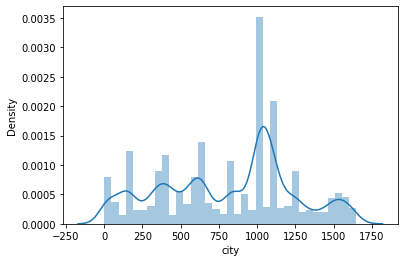

In [43]:
sns.distplot(df['city'])

<AxesSubplot:xlabel='branch_code', ylabel='Density'>

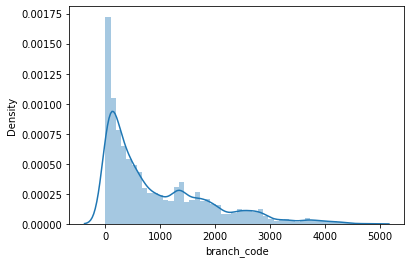

In [44]:
sns.distplot(df['branch_code'])

In [45]:
df.pivot_table(index='city',values='branch_code',aggfunc=np.sum)

""
city
0.0
1.0
2.0
3.0
4.0
...
1645.0
1646.0
1647.0


In [46]:
df['city'].unique()

[187.0, 1020.0, 1494.0, 1096.0, 623.0, ..., 935.0, 343.0, 1028.0, 556.0, 723.0]
Length: 1502
Categories (1604, float64): [0.0, 1.0, 2.0, 3.0, ..., 1646.0, 1647.0, 1648.0, 1649.0]

In [47]:
aaa=pd.DataFrame(df[df['city']==1646.0]['branch_code'].value_counts())



In [48]:
aaa[aaa['branch_code']>0]

,branch_code
1432,1


In [49]:
df.groupby(['city','branch_code'])['branch_code'].count()

city    branch_code
0.0     1              0
        2              0
        3              0
        4              0
        5              0
                      ..
1649.0  4724           0
        4737           0
        4753           0
        4764           0
        4782           0
Name: branch_code, Length: 5108740, dtype: int64

In [50]:
df

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,dayofyear_ls_tran,weekofyear_ls_tran,monthofyear_ls_tran,dayofweek_ls_tran,days_since_last_transaction
0,2101,66,Male,0,self_employed,187.0,2,755,1458.71,1458.71,...,0.20,0.20,1458.71,1458.71,0,141.0,21.0,5.0,1.0,224.0
1,2348,35,Male,0,self_employed,1020.0,2,3214,5390.37,8704.66,...,5486.27,100.56,6496.78,8787.61,0,305.0,44.0,11.0,4.0,60.0
2,1579,42,Male,2,self_employed,1494.0,3,388,927.72,1401.72,...,588.62,1538.06,1157.15,1677.16,1,307.0,44.0,11.0,6.0,58.0
3,1923,42,Female,0,self_employed,1096.0,2,1666,15202.20,16059.34,...,857.50,286.07,15719.44,15349.75,0,305.0,44.0,11.0,4.0,60.0
4,2048,72,Male,0,retired,1020.0,1,1,7006.93,7714.19,...,1299.64,439.26,7076.06,7755.98,0,267.0,39.0,9.0,1.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24699,2398,42,Male,0,self_employed,146.0,2,286,7493.69,6777.41,...,1103.20,1183.04,7956.03,7431.36,0,308.0,45.0,11.0,0.0,57.0
24700,2325,10,Female,0,student,1020.0,2,1207,1076.43,1076.43,...,0.30,0.30,1076.43,1076.43,0,295.0,43.0,10.0,1.0,70.0
24701,1537,34,Female,0,self_employed,1046.0,2,223,3844.10,4069.21,...,901.00,1014.07,3738.54,3690.32,0,351.0,51.0,12.0,1.0,14.0
24702,2376,47,Male,0,salaried,1096.0,2,588,65511.97,61017.55,...,168.23,71.80,61078.50,57564.24,1,365.0,1.0,12.0,1.0,0.0


In [51]:
df1=df[:]

In [52]:
df1['city']=df1['city'].astype('float64')
df1['branch_code']=df1['branch_code'].astype('float64')
df1['gender']=np.where(df1['gender']=='Male',1,0)


In [53]:
df1=pd.get_dummies(df1,columns=['occupation'],drop_first=True)

In [54]:
df1

,vintage,age,gender,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,...,churn,dayofyear_ls_tran,weekofyear_ls_tran,monthofyear_ls_tran,dayofweek_ls_tran,days_since_last_transaction,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,2101,66,1,0,187.0,2,755.0,1458.71,1458.71,1458.71,...,0,141.0,21.0,5.0,1.0,224.0,0,0,1,0
1,2348,35,1,0,1020.0,2,3214.0,5390.37,8704.66,7799.26,...,0,305.0,44.0,11.0,4.0,60.0,0,0,1,0
2,1579,42,1,2,1494.0,3,388.0,927.72,1401.72,1643.31,...,1,307.0,44.0,11.0,6.0,58.0,0,0,1,0
3,1923,42,0,0,1096.0,2,1666.0,15202.20,16059.34,15211.29,...,0,305.0,44.0,11.0,4.0,60.0,0,0,1,0
4,2048,72,1,0,1020.0,1,1.0,7006.93,7714.19,7859.74,...,0,267.0,39.0,9.0,1.0,98.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24699,2398,42,1,0,146.0,2,286.0,7493.69,6777.41,8082.48,...,0,308.0,45.0,11.0,0.0,57.0,0,0,1,0
24700,2325,10,0,0,1020.0,2,1207.0,1076.43,1076.43,2282.19,...,0,295.0,43.0,10.0,1.0,70.0,0,0,0,1
24701,1537,34,0,0,1046.0,2,223.0,3844.10,4069.21,3668.83,...,0,351.0,51.0,12.0,1.0,14.0,0,0,1,0
24702,2376,47,1,0,1096.0,2,588.0,65511.97,61017.55,53444.81,...,1,365.0,1.0,12.0,1.0,0.0,0,1,0,0


In [55]:
df1['customer_nw_category']=df['customer_nw_category'].astype('float64')

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24704 entries, 0 to 24703
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   vintage                         24704 non-null  int64  
 1   age                             24704 non-null  int64  
 2   gender                          24704 non-null  int32  
 3   dependents                      24704 non-null  int64  
 4   city                            24704 non-null  float64
 5   customer_nw_category            24704 non-null  float64
 6   branch_code                     24704 non-null  float64
 7   current_balance                 24704 non-null  float64
 8   previous_month_end_balance      24704 non-null  float64
 9   average_monthly_balance_prevQ   24704 non-null  float64
 10  average_monthly_balance_prevQ2  24704 non-null  float64
 11  current_month_credit            24704 non-null  float64
 12  previous_month_credit           

In [57]:
X = df1.drop(columns = ['churn'])
Y = df1['churn']

In [58]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [59]:
#splitting the dataset
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_X, Y, train_size = 0.80, stratify = Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((19763, 26), (4941, 26), (19763,), (4941,))

In [60]:
from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight = 'balanced')

In [61]:
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_test)              # Predicting class
predicted_probabilities = classifier.predict_proba(x_test) # Predicting probabilities

In [62]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, predicted_values)
cf

array([[2970,  999],
       [ 334,  638]], dtype=int64)

In [63]:
#Accuracy
classifier.score(x_test, y_test)

0.7302165553531674

In [64]:
#calculating the precision score
from sklearn.metrics import precision_score
Precision = precision_score(y_test, predicted_values)
Precision

0.3897373243738546

In [65]:
#calculating recall score
from sklearn.metrics import recall_score
Recall = recall_score(y_test, predicted_values)
Recall

0.6563786008230452

In [66]:
# manually calculating the f1 score
f1 = 2/((1/Precision)+(1/Recall))
f1

0.4890762744346493

In [67]:
#calculating the f1-score
from sklearn.metrics import f1_score
F1 = f1_score(y_test, predicted_values)
F1

0.4890762744346492

In [68]:
# calculating precision, recall, f1-score and support at once.
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision, recall, f1, support = PRF_summary(y_test, predicted_values)
precision,recall,f1,support

(array([0.89891041, 0.38973732]),
 array([0.74829932, 0.6563786 ]),
 array([0.81671937, 0.48907627]),
 array([3969,  972], dtype=int64))

In [69]:
from sklearn.metrics import classification_report
k = classification_report(y_test, predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      3969
           1       0.39      0.66      0.49       972

    accuracy                           0.73      4941
   macro avg       0.64      0.70      0.65      4941
weighted avg       0.80      0.73      0.75      4941



In [70]:
# gathering Precision/recall scores for different thresholds
from sklearn.metrics import precision_recall_curve
precision_points, recall_points, threshold_points = precision_recall_curve(y_test, predicted_probabilities[:,1])
precision_points.shape, recall_points.shape, threshold_points.shape

((4940,), (4940,), (4939,))

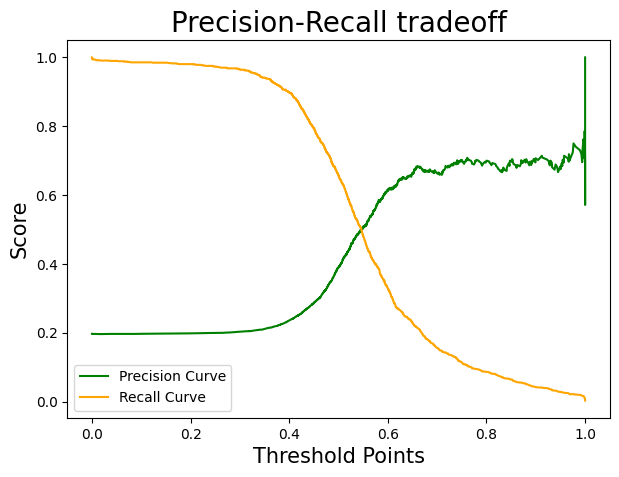

In [71]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot( threshold_points, precision_points[:-1], color = 'green', label = 'Precision Curve')
plt.plot( threshold_points, recall_points[:-1], color = 'orange', label = 'Recall Curve')
plt.xlabel('Threshold Points', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.title('Precision-Recall tradeoff', fontsize = 20)
plt.legend()

In [72]:
from sklearn.metrics import roc_curve , roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, predicted_probabilities[:,1])

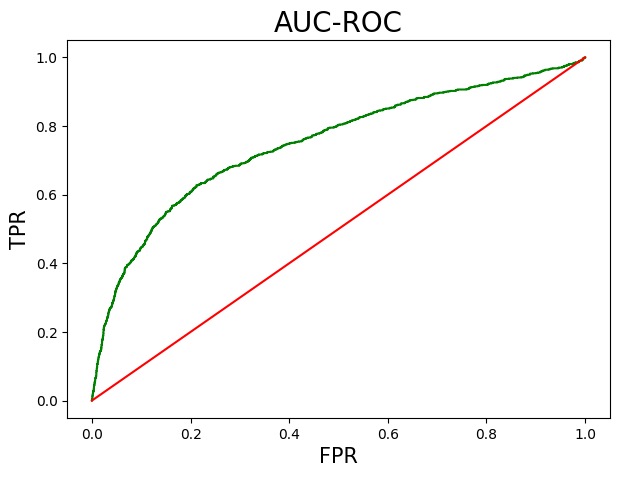

0.7495813749977968

In [73]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot( fpr, tpr, color = 'green')
plt.plot( [0,1], [0,1], label = 'baseline', color = 'red')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('AUC-ROC', fontsize = 20)
plt.show()
roc_auc_score(y_test, predicted_probabilities[:,1])

In [74]:
# arranging the data
c = classifier.coef_.reshape(-1)
x = X.columns

coeff_plot = pd.DataFrame( {
                            'coefficients': c,
                            'variable' : x
                            })

# sorting the values
coeff_plot = coeff_plot.sort_values(by = 'coefficients')
coeff_plot.head()

,coefficients,variable
7,-2.570593,current_balance
11,-0.569255,current_month_credit
8,-0.179840,previous_month_end_balance
15,-0.158061,current_month_balance
16,-0.146365,previous_month_balance


Text(0.5, 1.0, 'Coefficient plot')

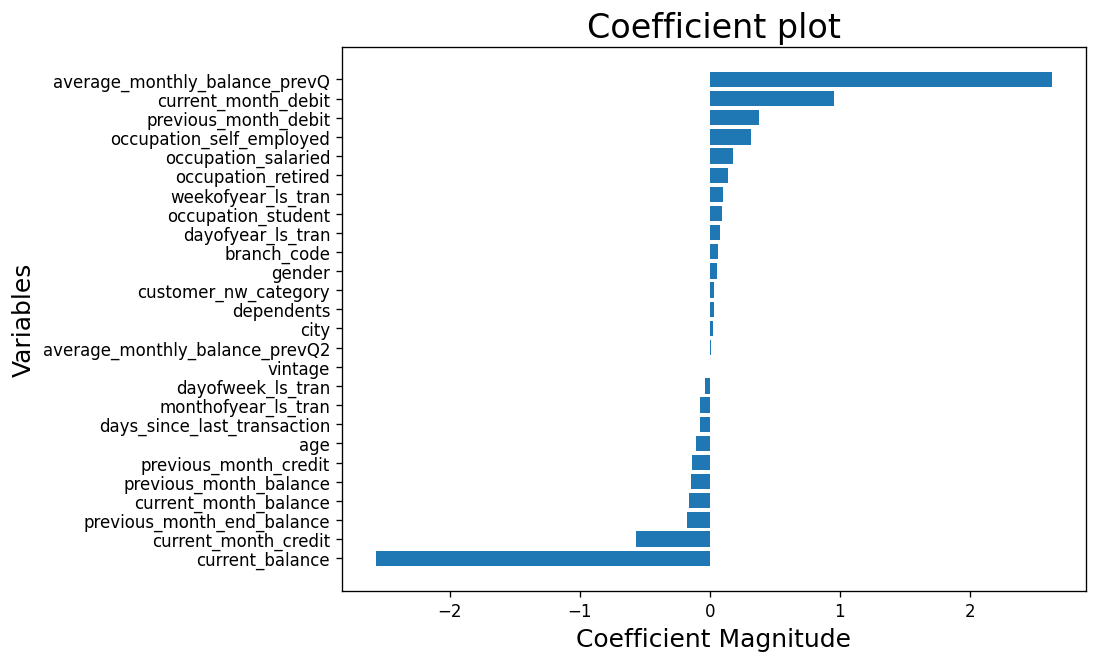

In [75]:
# Coefficient Plot

plt.figure(figsize=(8, 6), dpi=120)
plt.barh( coeff_plot['variable'] , coeff_plot['coefficients'] )
plt.xlabel( "Coefficient Magnitude", fontsize = 15)
plt.ylabel('Variables', fontsize = 15)
plt.title('Coefficient plot', fontsize = 20)

# Decision Tree

In [76]:
#splitting the dataset

from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(X, Y, test_size = 0.20 , stratify=Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((19763, 26), (4941, 26), (19763,), (4941,))

In [77]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(class_weight='balanced')

In [78]:
DTC.fit(x_train,y_train)
pred1=DTC.predict(x_train)

In [79]:
from sklearn.metrics import classification_report
k = classification_report(y_train, pred1)
print(k)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15873
           1       1.00      1.00      1.00      3890

    accuracy                           1.00     19763
   macro avg       1.00      1.00      1.00     19763
weighted avg       1.00      1.00      1.00     19763



In [80]:
DTC.fit(x_train,y_train)
pred2=DTC.predict(x_test)
k2 = classification_report(y_test,pred2)

In [81]:
print(k2)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3969
           1       0.42      0.42      0.42       972

    accuracy                           0.77      4941
   macro avg       0.64      0.64      0.64      4941
weighted avg       0.77      0.77      0.77      4941



In [82]:
# Function to calculate train and test F1-Score

def cal_f1(model , x1 , y1 , x2 , y2 ):
    
    model.fit(x1,y1)
    
    predict_dtc=model.predict(x1)
    f1= f1_score(y1, predict_dtc)
    
    predict_dtc=model.predict(x2)
    f2= f1_score(y2, predict_dtc)
    
    return f1 , f2

In [83]:
cal_f1(DTC , x_train , y_train , x_test , y_test)

(1.0, 0.43056272586473937)

In [84]:
# Function to plot F1-score

def effect(train_f1 , test_f1 , x_axis , title):
  plt.figure(figsize=(15,7),dpi=150)
  plt.plot(x_axis , train_f1 , color='r' , label='Train F1 score')
  plt.plot(x_axis , test_f1 , color='g' , label='Test F1 score')
  plt.title(title)
  plt.legend()
  plt.xlabel('parameter value')
  plt.ylabel('F1 Score')
  plt.show()

# max_depth

In [85]:
max_depth=[i for i in range(1,50)]
train_=[]
test_=[]

for i in max_depth:
    DTC=DecisionTreeClassifier(class_weight='balanced' , max_depth= i , random_state= 7 )
    f1 , f2 =cal_f1(DTC, x_train , y_train , x_test , y_test)
    train_.append(f1)
    test_.append(f2)
    

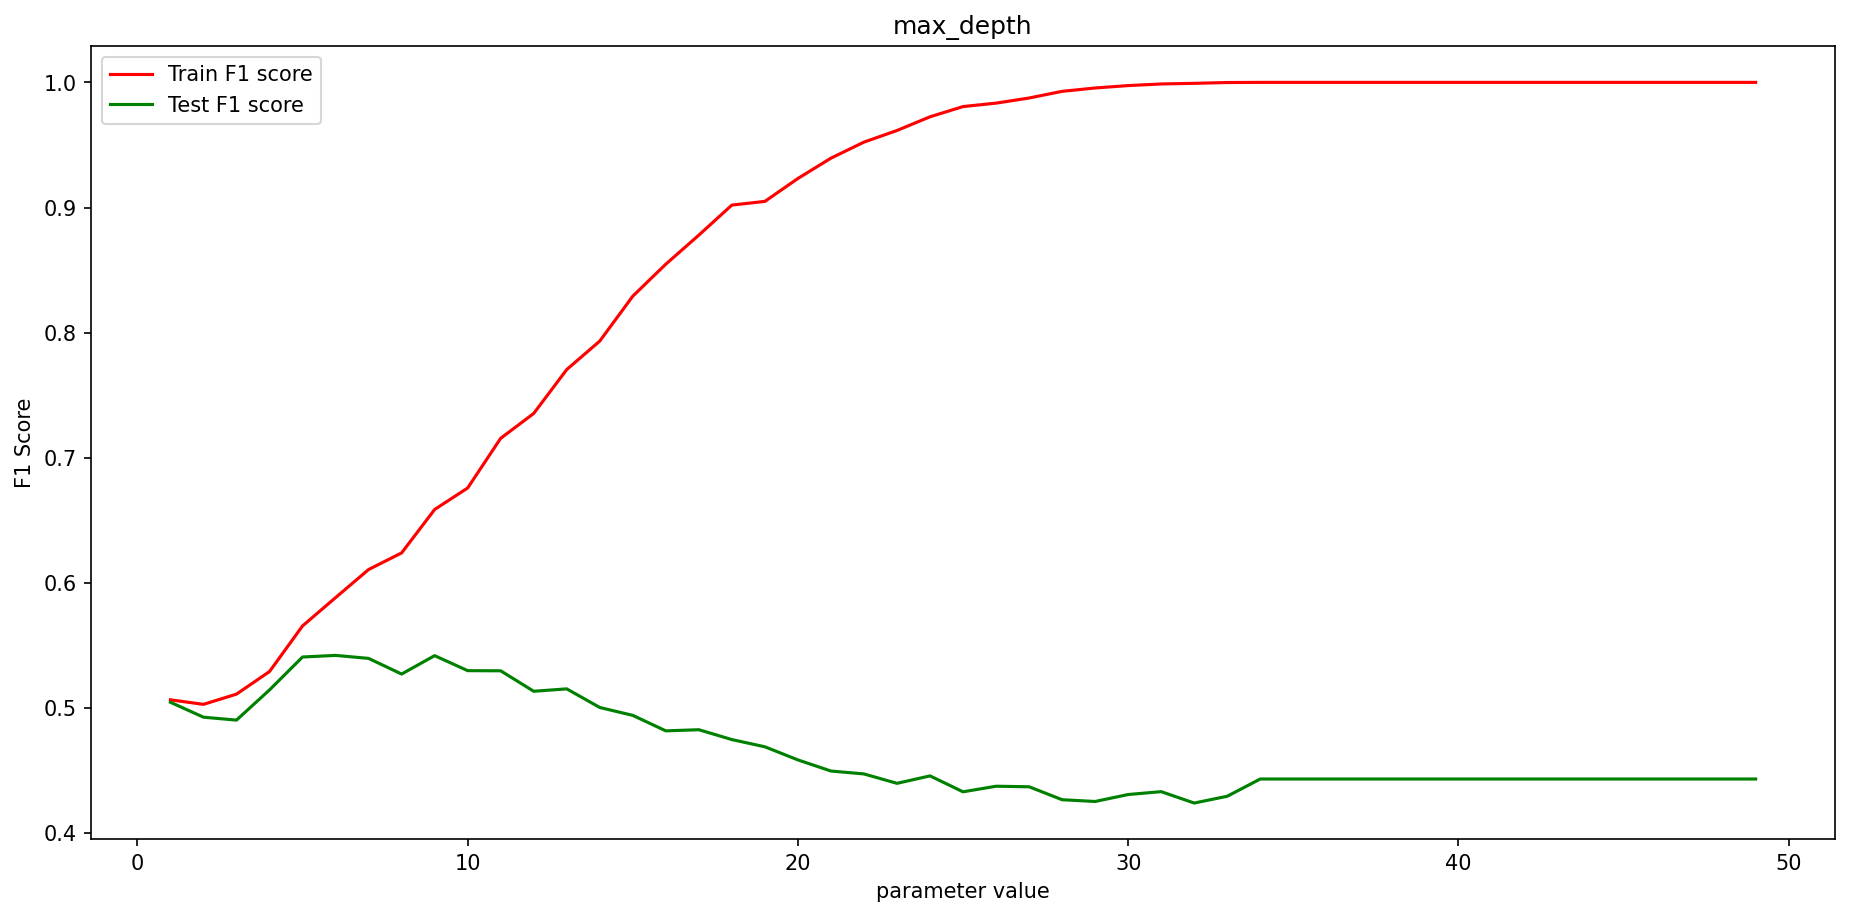

In [86]:
effect(train_,test_,(range(1,50)),'max_depth')

# min_samples_split

In [87]:
min_samples_split=[i for i in range(2,5000,25)]
train_=[]
test_=[]

for i in min_samples_split:
    DTC=DecisionTreeClassifier(class_weight='balanced' , min_samples_split= i , random_state= 7 )
    f1 , f2 =cal_f1(DTC, x_train , y_train , x_test , y_test)
    train_.append(f1)
    test_.append(f2)
    

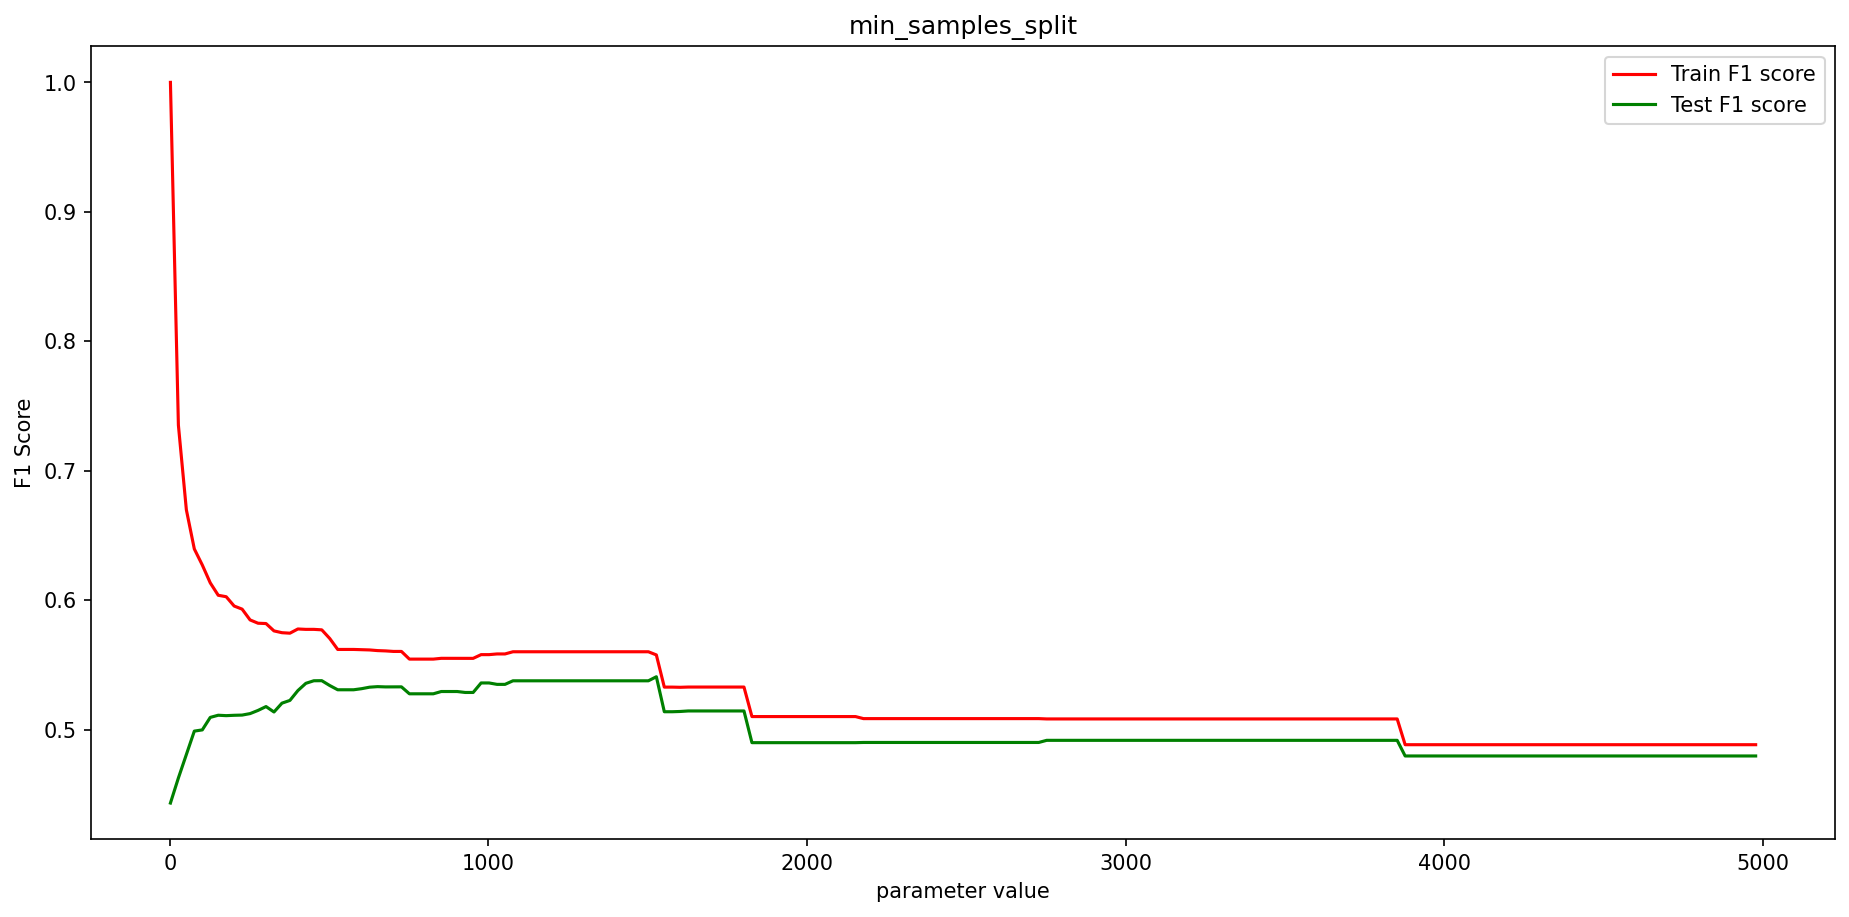

In [88]:
effect( train_ , test_, range(2,5000,25) , 'min_samples_split')

# max_leaf_nodes

In [89]:
max_leaf_nodes=[i for i in range(2,200,10)]
train_=[]
test_=[]

for i in max_leaf_nodes:
    DTC=DecisionTreeClassifier(class_weight='balanced' , max_leaf_nodes= i , random_state= 7 )
    f1 , f2 =cal_f1(DTC, x_train , y_train , x_test , y_test)
    train_.append(f1)
    test_.append(f2)
    

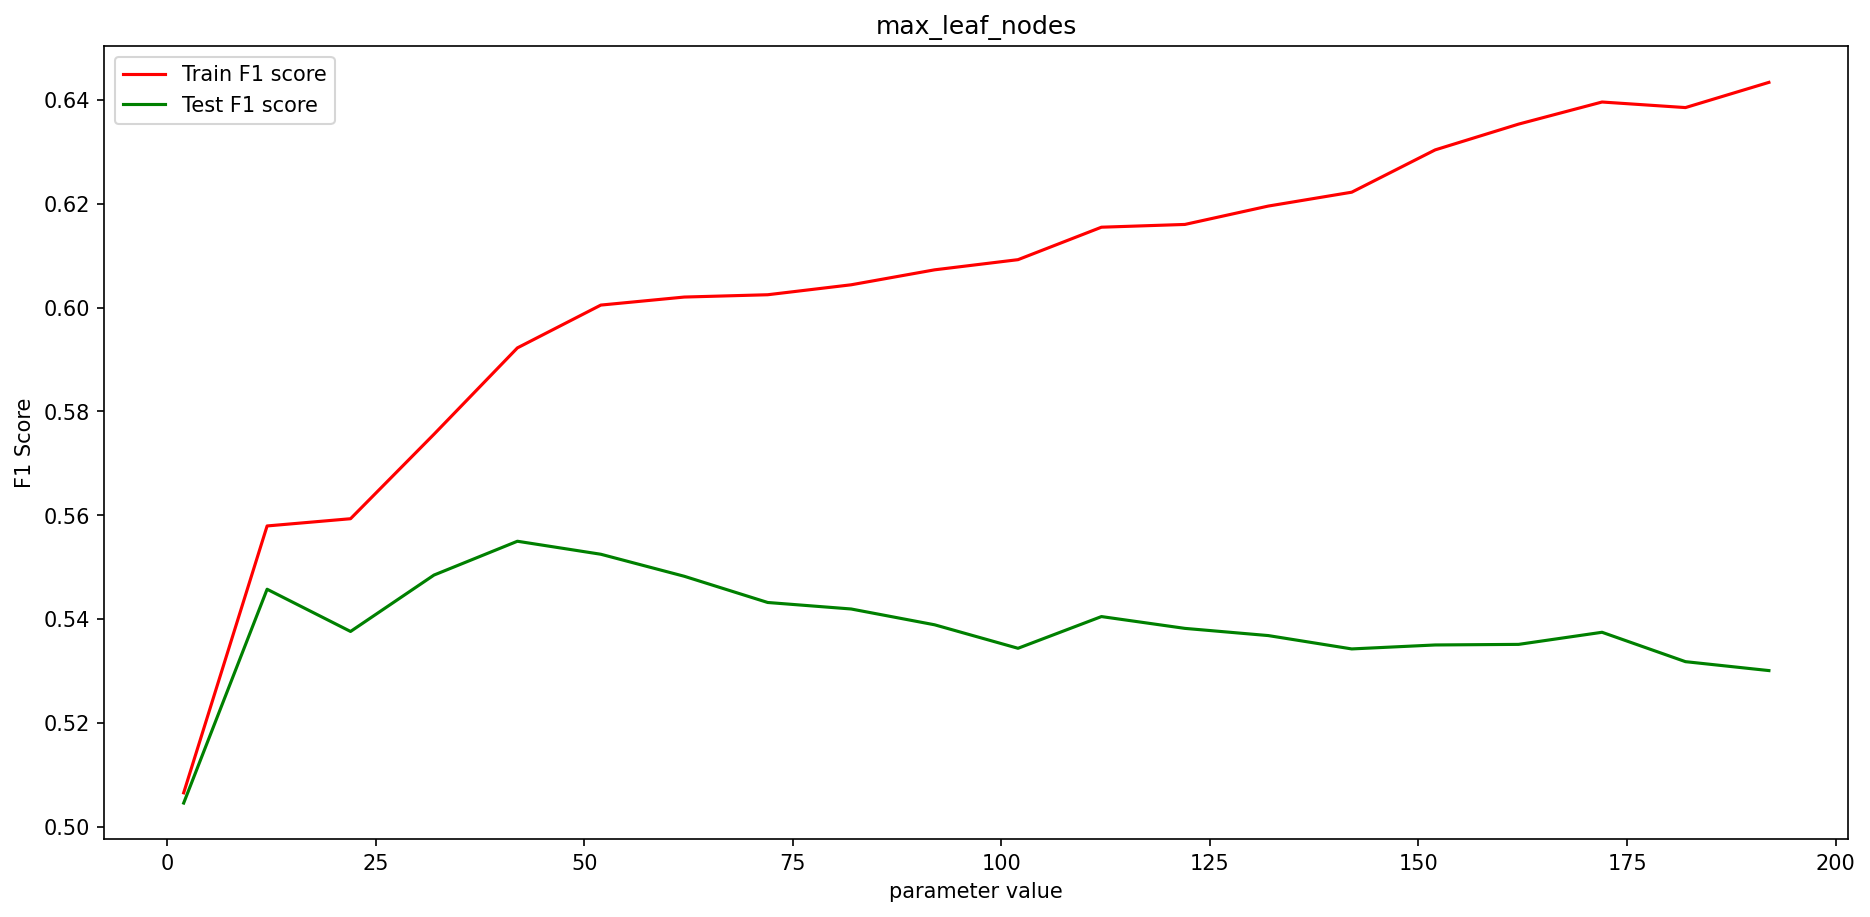

In [90]:
effect( train_ , test_, range(2,200,10) , 'max_leaf_nodes')

# min samples leaf

In [91]:
min_samples_leaf=[i for i in range(2,200,10)]
train_=[]
test_=[]

for i in min_samples_leaf:
    DTC=DecisionTreeClassifier(class_weight='balanced' , min_samples_leaf= i , random_state= 7 )
    f1 , f2 =cal_f1(DTC, x_train , y_train , x_test , y_test)
    train_.append(f1)
    test_.append(f2)
    

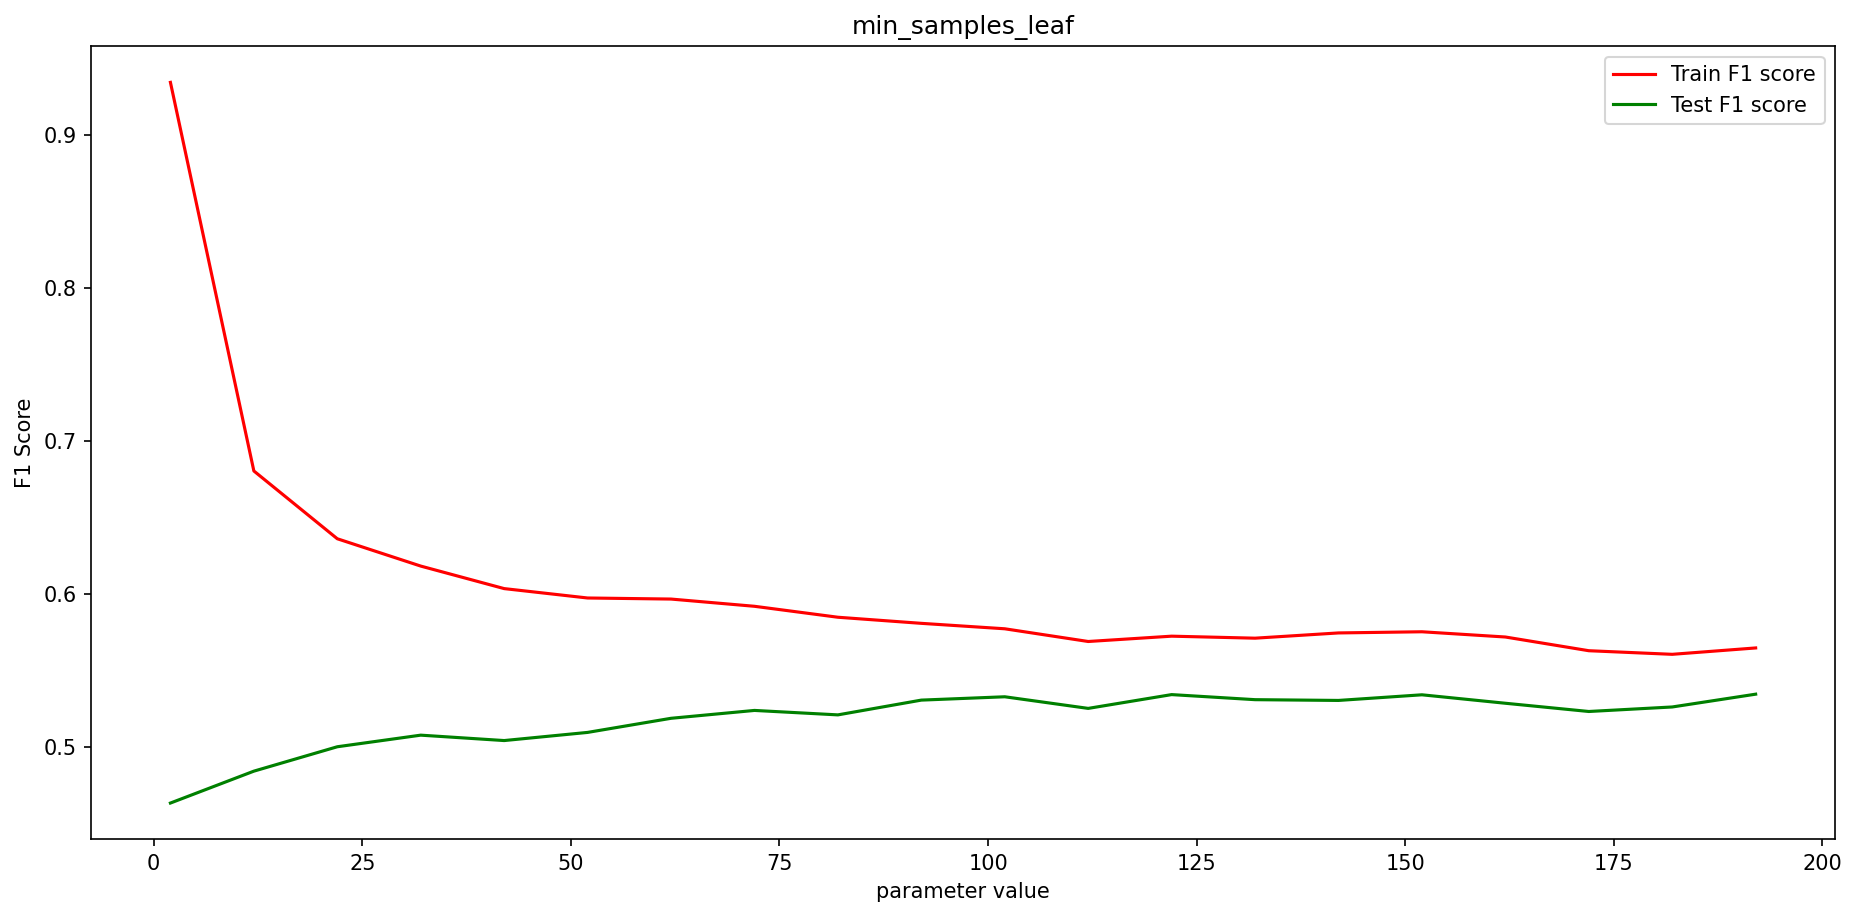

In [92]:
effect( train_ , test_, range(2,200,10) , 'min_samples_leaf')

In [93]:
# F1-Score after setting all parameters value

DTC_=DecisionTreeClassifier(class_weight='balanced' , max_depth = 7 , min_samples_split=740 , max_leaf_nodes=24 , min_samples_leaf=110 , random_state= 7 )
f1 , f2 =cal_f1(DTC_, x_train , y_train , x_test , y_test)

In [94]:
# Final F1-Score

f1,f2

(0.558567880794702, 0.5389718076285241)

# Recall

In [95]:
# Function to calculate train and test F1-Score

def cal_recall(model , x1 , y1 , x2 , y2 ):
    
    model.fit(x1,y1)
    
    predict_dtc=model.predict(x1)
    r1= recall_score(y1, predict_dtc)
    
    predict_dtc=model.predict(x2)
    r2= recall_score(y2, predict_dtc)
    
    return r1 , r2

In [96]:
# Function to plot F1-score

def effect_r(train_r1 , test_r1 , x_axis , title):
  plt.figure(figsize=(15,7),dpi=150)
  plt.plot(x_axis , train_r1 , color='r' , label='Train R1 score')
  plt.plot(x_axis , test_r1 , color='g' , label='Test R1 score')
  plt.title(title)
  plt.legend()
  plt.xlabel('parameter value')
  plt.ylabel('Recall Score')
  plt.show()

# max_depth

In [97]:
max_depth=[i for i in range(1,50)]
train_=[]
test_=[]

for i in max_depth:
    DTC=DecisionTreeClassifier(class_weight='balanced' , max_depth= i , random_state= 7 )
    f1 , f2 =cal_recall(DTC, x_train , y_train , x_test , y_test)
    train_.append(f1)
    test_.append(f2)
    

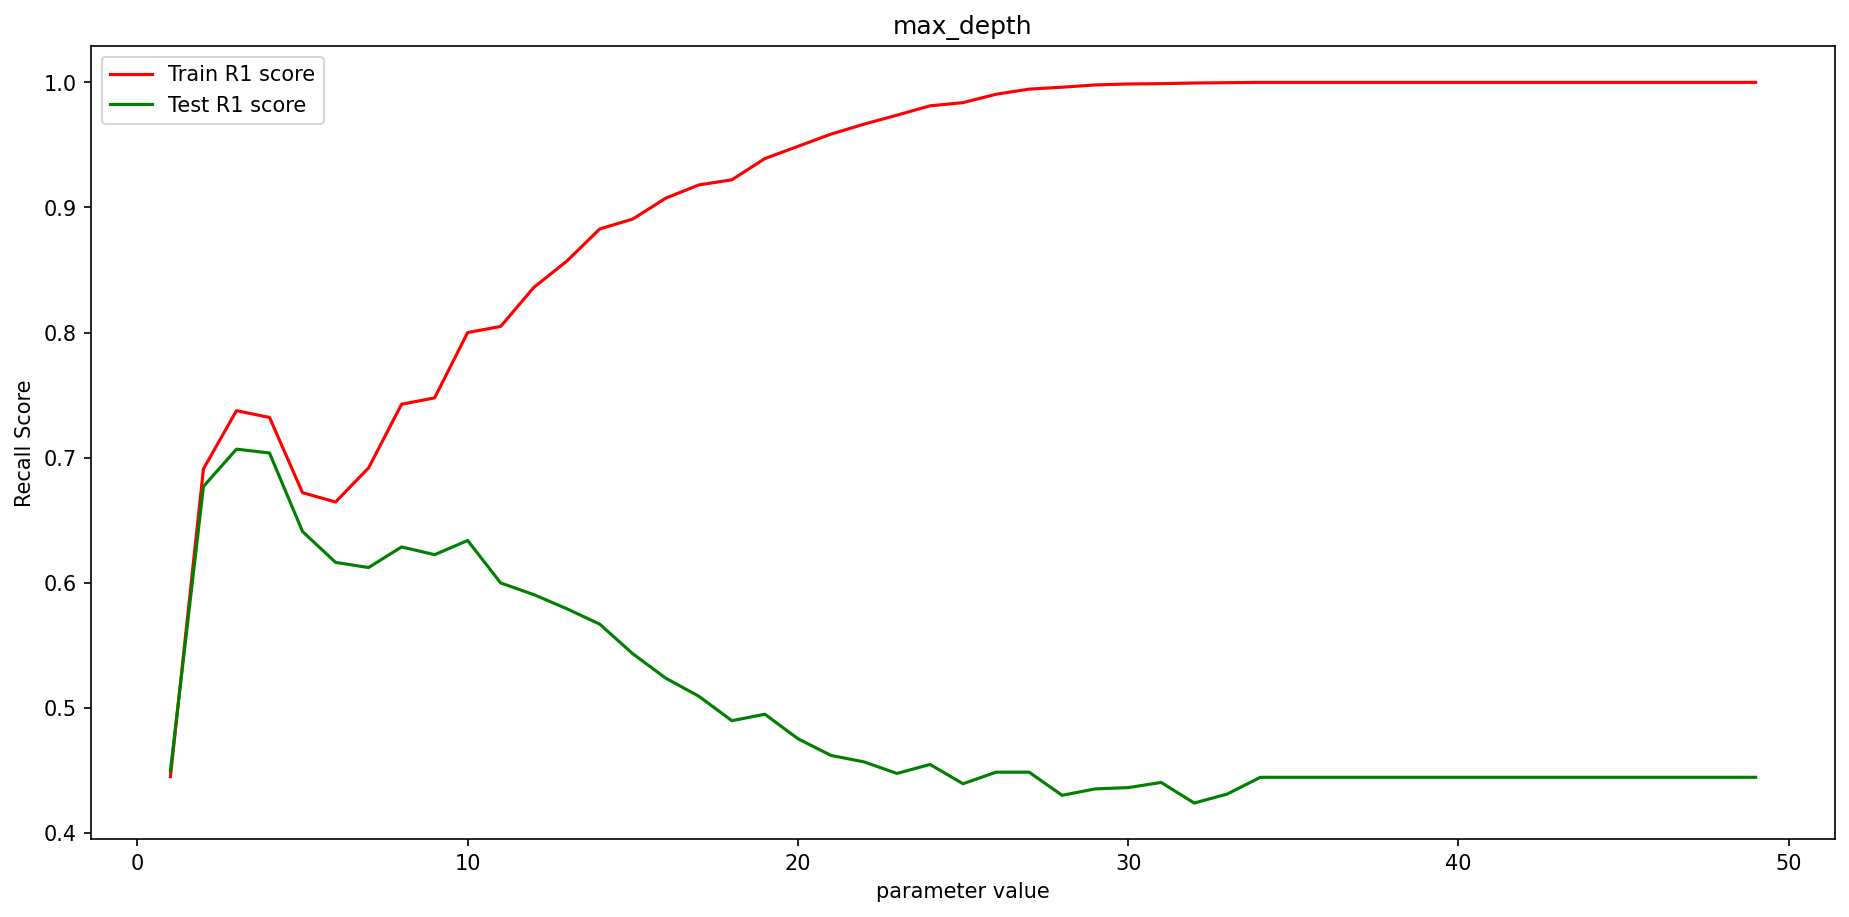

In [98]:
effect_r(train_,test_,(range(1,50)),'max_depth')

In [99]:
train_[3],test_[3]

(0.732133676092545, 0.7037037037037037)

# min_samples_split

In [100]:
min_samples_split=[i for i in range(2,5000,25)]
train_=[]
test_=[]

for i in min_samples_split:
    DTC=DecisionTreeClassifier(class_weight='balanced' , min_samples_split= i , random_state= 7 )
    f1 , f2 =cal_recall(DTC, x_train , y_train , x_test , y_test)
    train_.append(f1)
    test_.append(f2)
    

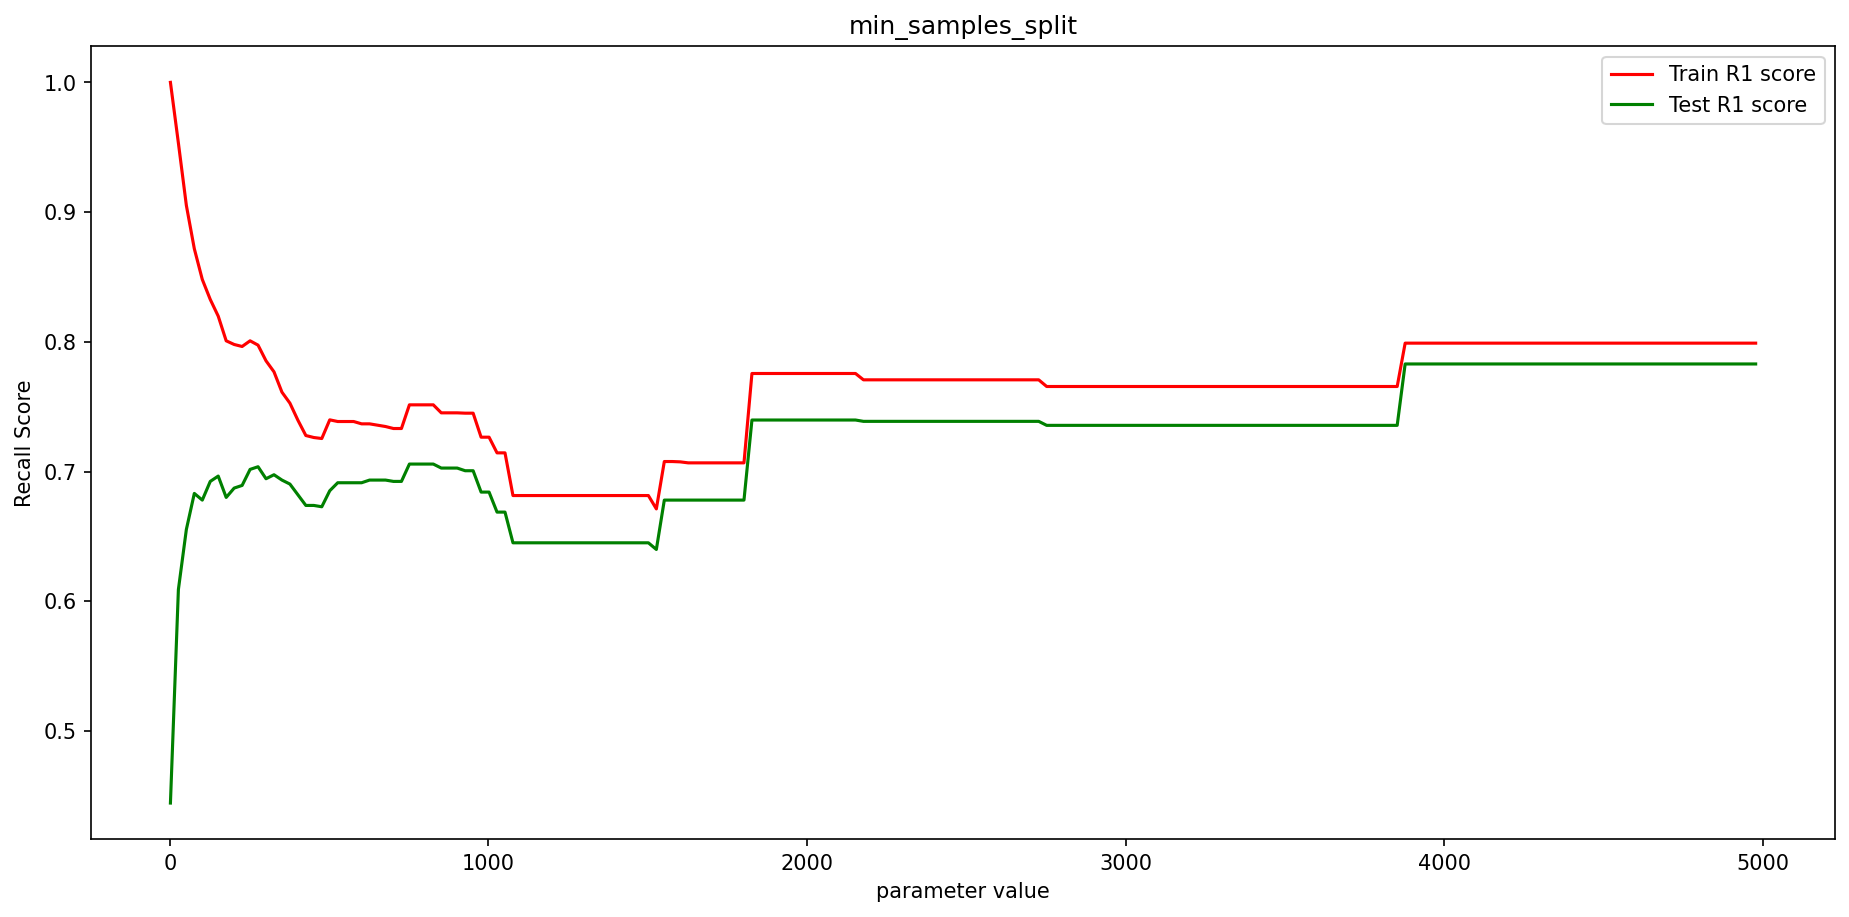

In [101]:
effect_r(train_,test_,range(2,5000,25),'min_samples_split')

In [102]:
min_samples_split=[i for i in range(2,5000,25)]
train_1=[]
test_1=[]

for i in min_samples_split:
    DTC=DecisionTreeClassifier(class_weight='balanced' ,max_depth= 5 , min_samples_split= i , random_state= 7 )
    f1 , f2 =cal_recall(DTC, x_train , y_train , x_test , y_test)
    train_1.append(f1)
    test_1.append(f2)
    

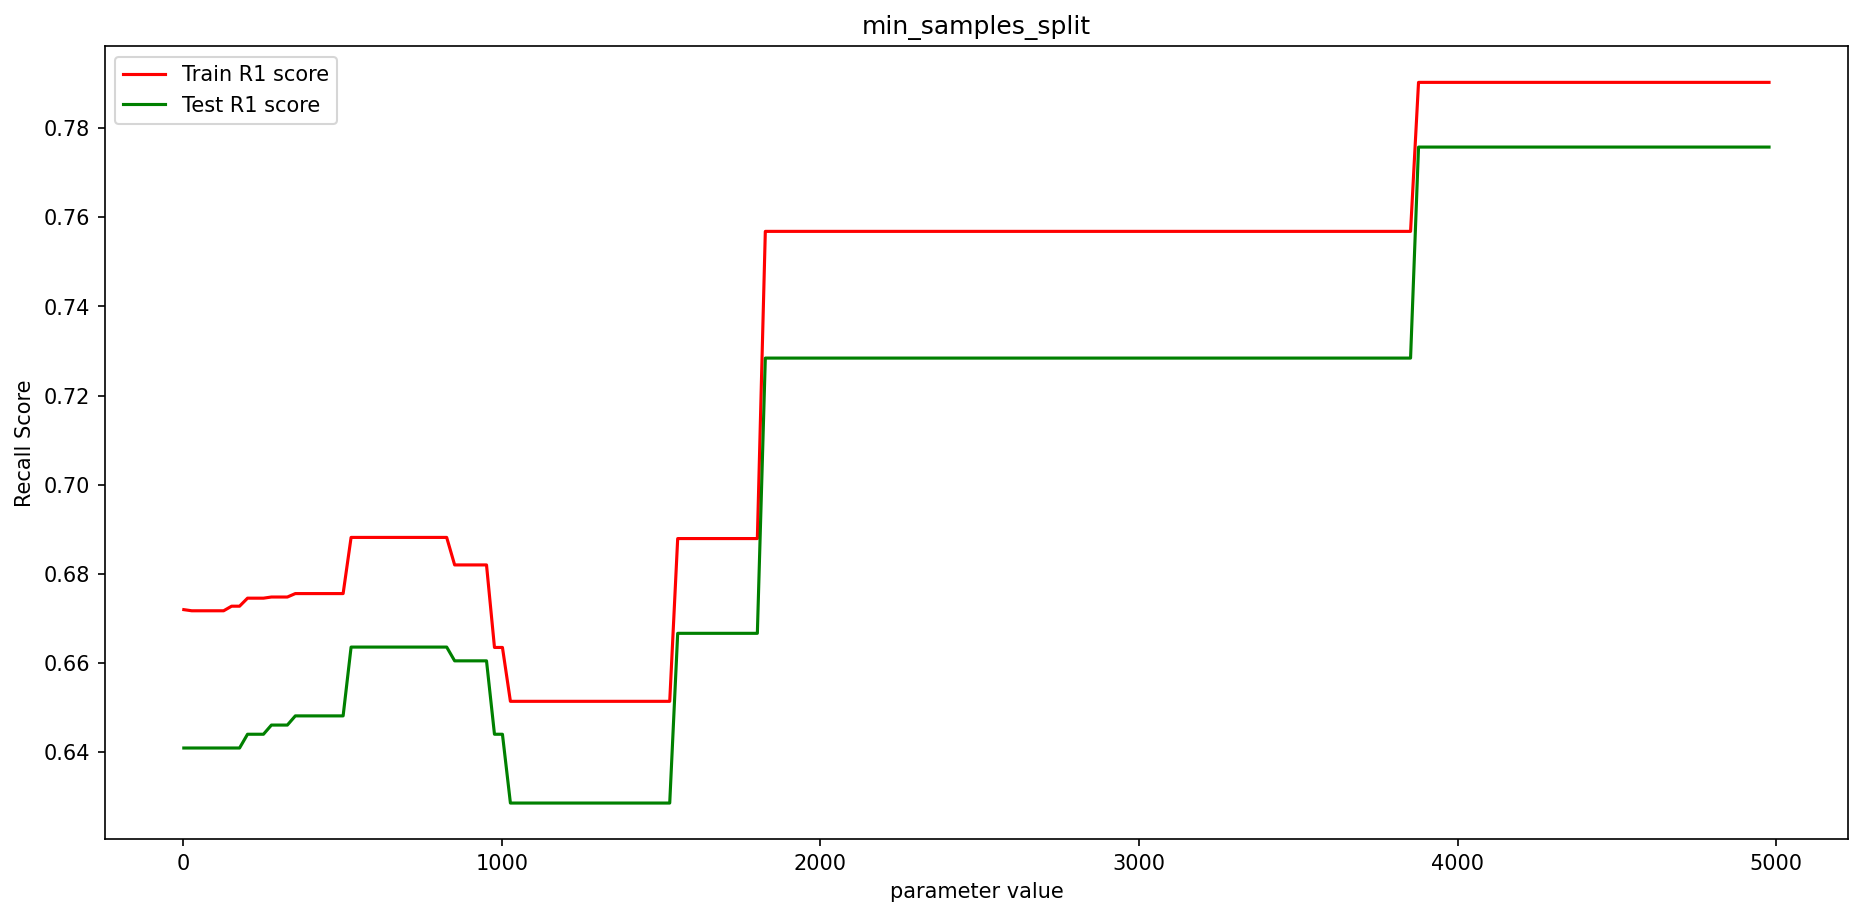

In [103]:
effect_r(train_1,test_1,range(2,5000,25),'min_samples_split')

In [104]:
for i,j in enumerate(train_1):
    if j>0.7:
        print(i,j)

73 0.7568123393316195
74 0.7568123393316195
75 0.7568123393316195
76 0.7568123393316195
77 0.7568123393316195
78 0.7568123393316195
79 0.7568123393316195
80 0.7568123393316195
81 0.7568123393316195
82 0.7568123393316195
83 0.7568123393316195
84 0.7568123393316195
85 0.7568123393316195
86 0.7568123393316195
87 0.7568123393316195
88 0.7568123393316195
89 0.7568123393316195
90 0.7568123393316195
91 0.7568123393316195
92 0.7568123393316195
93 0.7568123393316195
94 0.7568123393316195
95 0.7568123393316195
96 0.7568123393316195
97 0.7568123393316195
98 0.7568123393316195
99 0.7568123393316195
100 0.7568123393316195
101 0.7568123393316195
102 0.7568123393316195
103 0.7568123393316195
104 0.7568123393316195
105 0.7568123393316195
106 0.7568123393316195
107 0.7568123393316195
108 0.7568123393316195
109 0.7568123393316195
110 0.7568123393316195
111 0.7568123393316195
112 0.7568123393316195
113 0.7568123393316195
114 0.7568123393316195
115 0.7568123393316195
116 0.7568123393316195
117 0.756812339

In [105]:
train_1[33],test_1[33]

(0.6881748071979434, 0.6635802469135802)

# max_leaf_nodes

In [106]:
max_leaf_nodes=[i for i in range(2,200,10)]
train_=[]
test_=[]

for i in max_leaf_nodes:
    DTC=DecisionTreeClassifier(class_weight='balanced' , max_leaf_nodes= i , random_state= 7 )
    f1 , f2 =cal_recall(DTC, x_train , y_train , x_test , y_test)
    train_.append(f1)
    test_.append(f2)
    

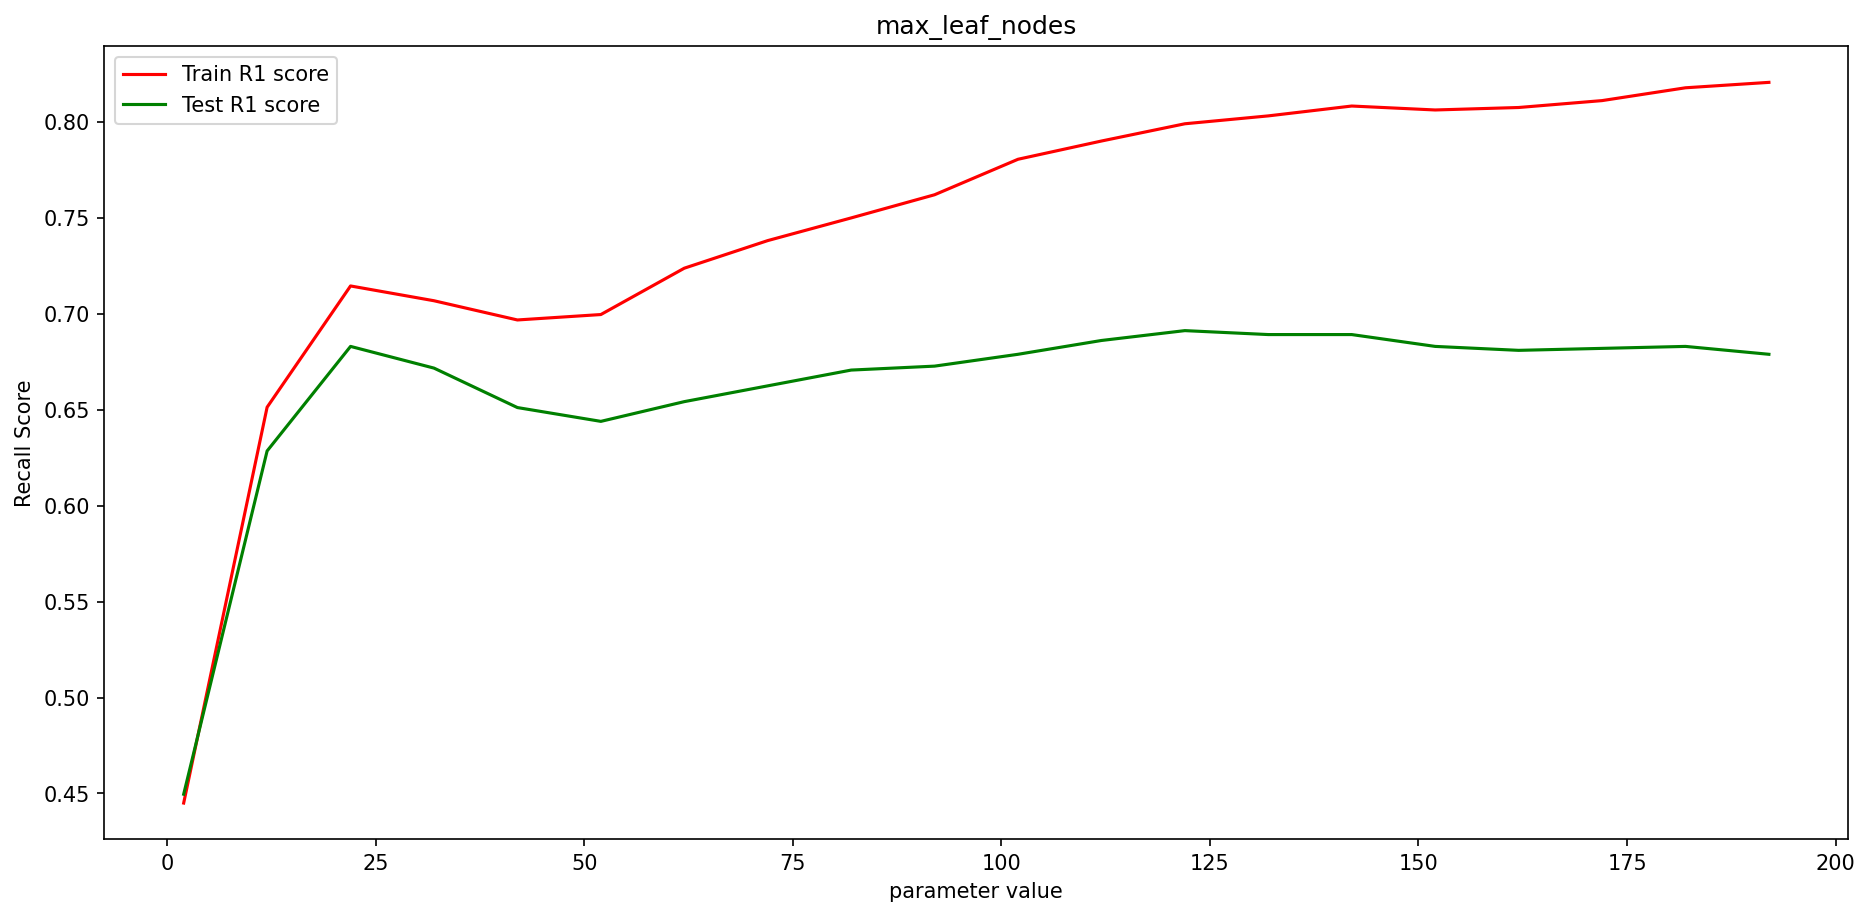

In [107]:
effect_r( train_ , test_, range(2,200,10) , 'max_leaf_nodes')

In [108]:
max_leaf_nodes=[i for i in range(2,200,10)]
train_=[]
test_=[]

for i in max_leaf_nodes:
    DTC=DecisionTreeClassifier(class_weight='balanced' , max_depth= 7 , min_samples_split= 33 , max_leaf_nodes= i , random_state= 7 )
    f1 , f2 =cal_recall(DTC, x_train , y_train , x_test , y_test)
    train_.append(f1)
    test_.append(f2)
    

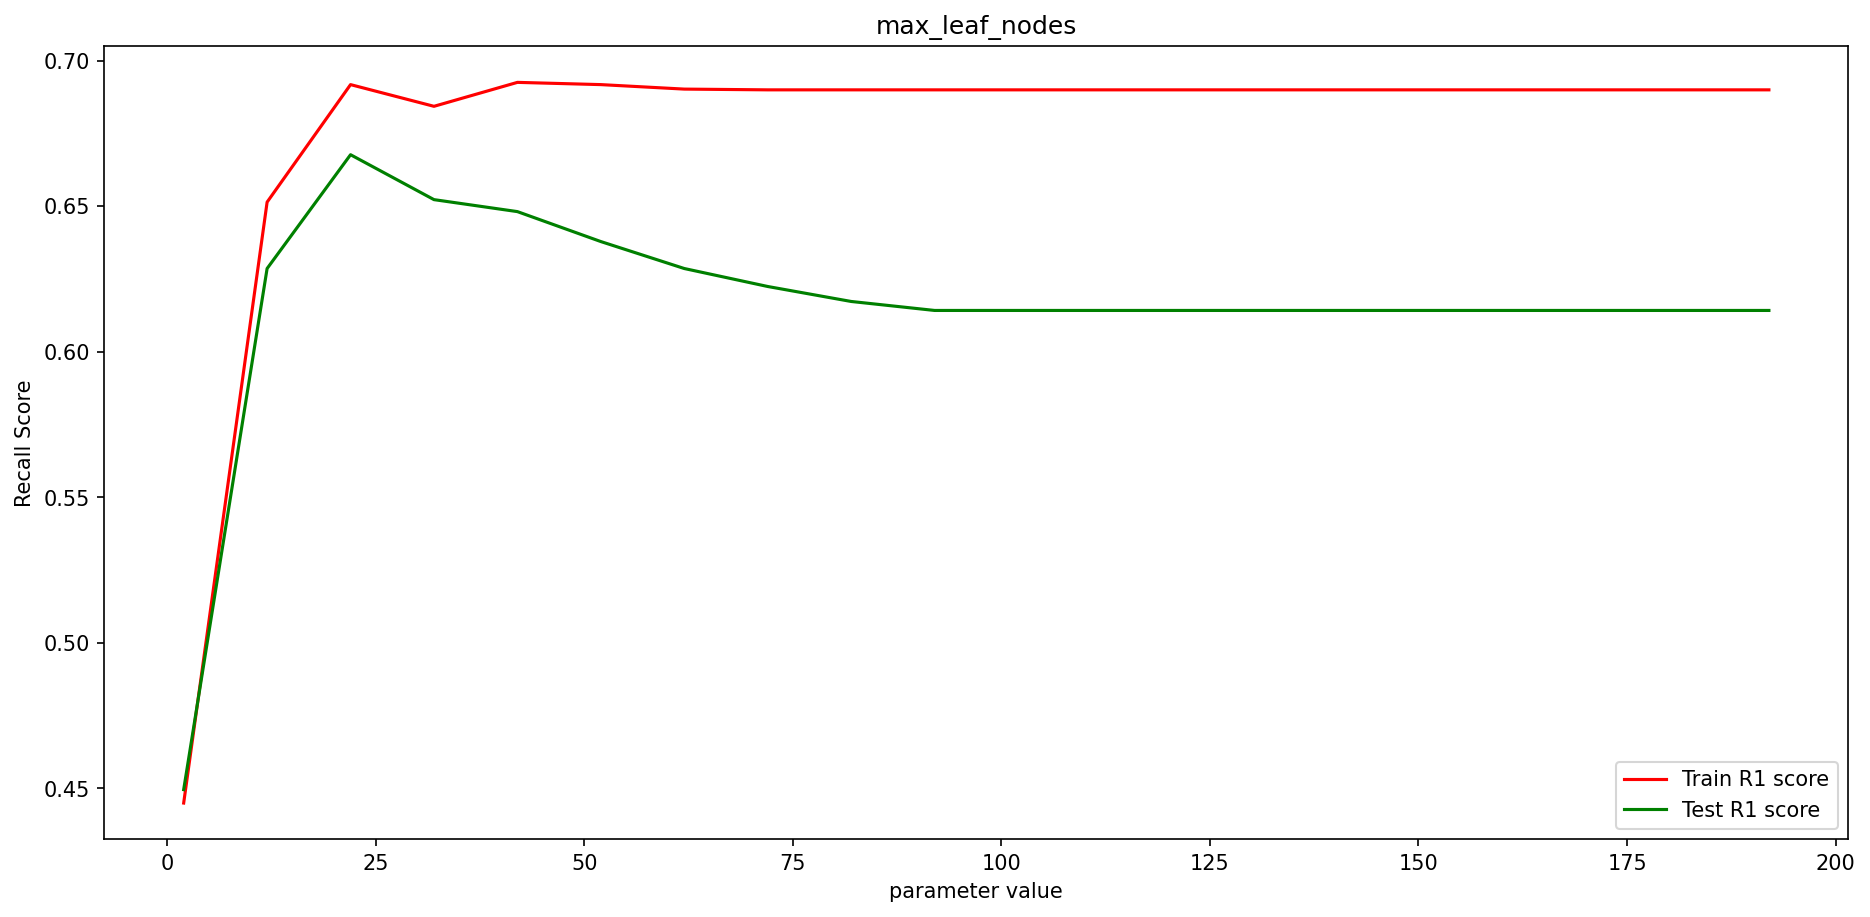

In [109]:
effect_r( train_ , test_, range(2,200,10) , 'max_leaf_nodes')

In [110]:
train_[3],test_[3]

(0.6843187660668381, 0.6522633744855967)

In [111]:
# Calculating Recall score (Decision Tree) after setting all parameters

DTC=DecisionTreeClassifier(class_weight='balanced' , max_depth= 2 , min_samples_split= 33 , max_leaf_nodes= 3 , random_state= 7 )
f1 , f2 =cal_recall(DTC, x_train , y_train , x_test , y_test)    

In [112]:
f1,f2

(0.6910025706940874, 0.676954732510288)